In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

## EDA

In [2]:
# Importing the dataset
df = pd.read_csv('b2b_leads_new.csv')
df.head()

,Company,Website,Industry,ProductOrServiceCategory,BusinessModel,EmployeesCount,RevenueUSD,YearFounded,BBBRating,Street,City,State,CompanyPhone,CompanyLinkedin,OwnerName,OwnerTitle,OwnerLinkedin,OwnerPhonesNumber,OwnerEmail,Converted
0,VertexSecure,www.vertexsecure.com,Retail,HR Tech,B2B,5,173798,2021,4.0,4682 2nd Ave,Bellevue,Washington,+1 (764) 765-6618,https://www.linkedin.com/company/vertexsecure/,Robert Garcia,CTO,https://www.linkedin.com/in/robertgarcia/,+1 (772) 651-4647,robert.garcia@vertexsecure.com,1
1,AstraCloud,www.astracloud.net,Banking,DevOps Tools,B2B,746,18715132,2014,6.0,7217 Broadway,Arlington,Virginia,+1 (463) 762-2338,https://www.linkedin.com/company/astracloud/,John Jackson,Founder,https://www.linkedin.com/in/johnjackson/,NaN,NaN,1
2,CyberCloud,www.cybercloud.net,Software,Marketing Services,B2B,458,1832000,2020,3.0,1699 Mission St,Philadelphia,Pennsylvania,+1 (813) 790-4608,https://www.linkedin.com/company/cybercloud/,Betty Rodriguez,Head of IT,https://www.linkedin.com/in/bettyrodriguez/,+1 (373) 593-3004,betty.rodriguez@cybercloud.net,0
3,PioneerSolutions,www.pioneersolutions.net,Retail,Marketing Services,B2B,481,12404171,2004,6.0,9995 Broadway,Chicago,Illinois,+1 (801) 653-2059,https://www.linkedin.com/company/pioneersoluti...,James Garcia,COO,https://www.linkedin.com/in/jamesgarcia/,NaN,james.garcia@pioneersolutions.net,1
4,AstraTechnologies,www.astratechnologies.net,Security,Customer Support,B2B,5,389025,2023,3.0,2235 Broadway,Richmond,Virginia,+1 (814) 645-5824,https://www.linkedin.com/company/astratechnolo...,Susan Thomas,COO,https://www.linkedin.com/in/susanthomas/,+1 (710) 208-5723,susan.thomas@astratechnologies.net,0


In [3]:
# Display basic statistics of the dataset
df.describe()

,EmployeesCount,RevenueUSD,YearFounded,BBBRating,Converted
count,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,493.011333,1.459777e+07,2009.684000,3.959333,0.350667
std,477.450355,2.316632e+07,8.537881,1.590188,0.477338
min,5.000000,1.000000e+04,1981.000000,0.000000,0.000000
25%,5.000000,3.333680e+05,2004.000000,3.000000,0.000000
50%,391.000000,5.944302e+06,2010.000000,4.000000,0.000000
75%,817.250000,1.850479e+07,2016.000000,5.000000,1.000000
max,2297.000000,2.060956e+08,2024.000000,6.000000,1.000000


In [4]:
# Checking for missing values
df.isnull().sum()

Company                       0
Website                       0
Industry                      0
ProductOrServiceCategory      0
BusinessModel                 0
EmployeesCount                0
RevenueUSD                    0
YearFounded                   0
BBBRating                     0
Street                        0
City                          0
State                         0
CompanyPhone                  0
CompanyLinkedin               0
OwnerName                     0
OwnerTitle                    0
OwnerLinkedin                 0
OwnerPhonesNumber           421
OwnerEmail                  201
Converted                     0
dtype: int64

In [5]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# Count Data by City
df['City'].value_counts()

City
Tempe               45
Charlotte           43
Chicago             42
Cambridge           42
Seattle             40
Arlington           40
Richmond            40
Columbus            39
Salt Lake City      36
Reston              36
Redmond             36
Boulder             35
Buffalo             35
Scottsdale          35
Provo               35
Waltham             35
Atlanta             34
Denver              34
Pittsburgh          34
Bellevue            33
Phoenix             33
Cincinnati          33
Allentown           33
Alpharetta          32
Durham              31
New York            30
Boston              30
Savannah            30
Raleigh             29
Orlando             29
Colorado Springs    28
Rochester           28
Jacksonville        27
Cleveland           26
San Antonio         25
Dallas              25
Philadelphia        25
Evanston            25
Naperville          24
Miami               24
San Diego           22
San Jose            22
Houston             21
Sacram

In [7]:
# Count Data by State
df['State'].value_counts()

State
Virginia          116
Arizona           113
Washington        109
California        109
Massachusetts     107
North Carolina    103
Ohio               98
Colorado           97
Georgia            96
Florida            95
New York           93
Pennsylvania       92
Illinois           91
Utah               91
Texas              90
Name: count, dtype: int64

In [8]:
# Distribution City and State
df.groupby(['State','City'])['State'].count()

State           City            
Arizona         Phoenix             33
                Scottsdale          35
                Tempe               45
California      Irvine              16
                Los Angeles          9
                Sacramento          21
                San Diego           22
                San Francisco       19
                San Jose            22
Colorado        Boulder             35
                Colorado Springs    28
                Denver              34
Florida         Jacksonville        27
                Miami               24
                Orlando             29
                Tampa               15
Georgia         Alpharetta          32
                Atlanta             34
                Savannah            30
Illinois        Chicago             42
                Evanston            25
                Naperville          24
Massachusetts   Boston              30
                Cambridge           42
                Waltham        

C:\Users\NxD08\AppData\Local\Temp\ipykernel_19852\2835068622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['Industry'],palette = 'Set2')


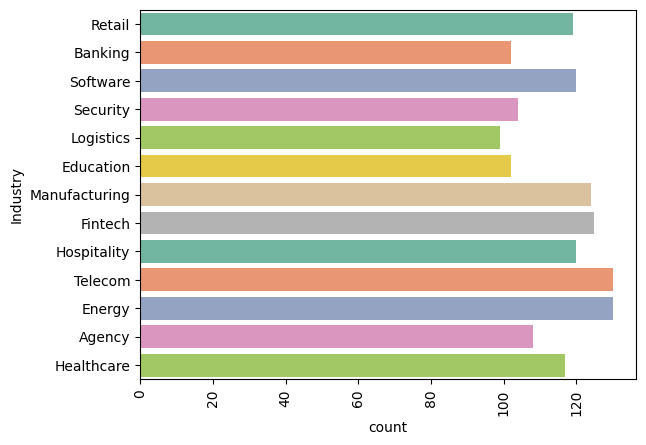

In [9]:
# Distribution of Industries
ax = sns.countplot(df['Industry'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

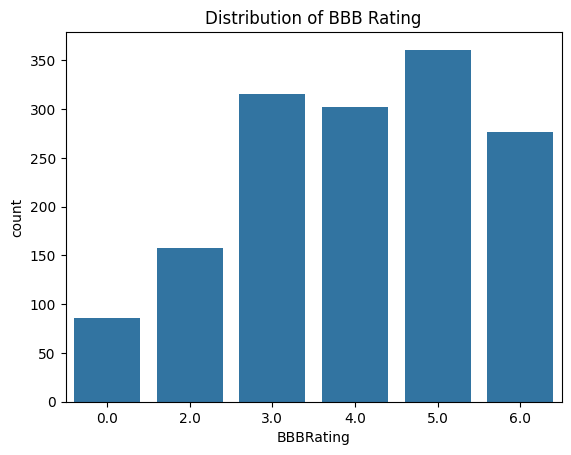

In [10]:
# Displaying distribution of BBB Rating
sns.countplot(x='BBBRating', data=df)
plt.title('Distribution of BBB Rating')
plt.show()

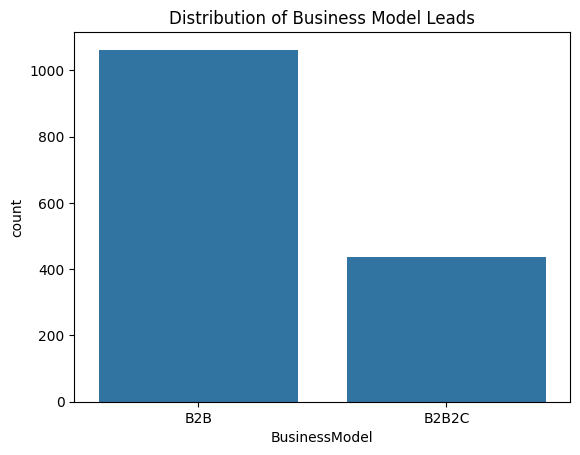

In [11]:
# Displaying the distribution of Business Model
sns.countplot(x='BusinessModel', data=df)
plt.title('Distribution of Business Model Leads')
plt.show()

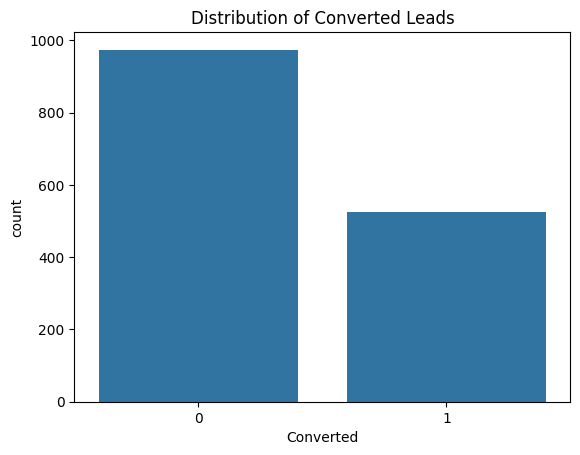

In [12]:
# Displaying the distribution of the target variable
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted Leads')
plt.show()

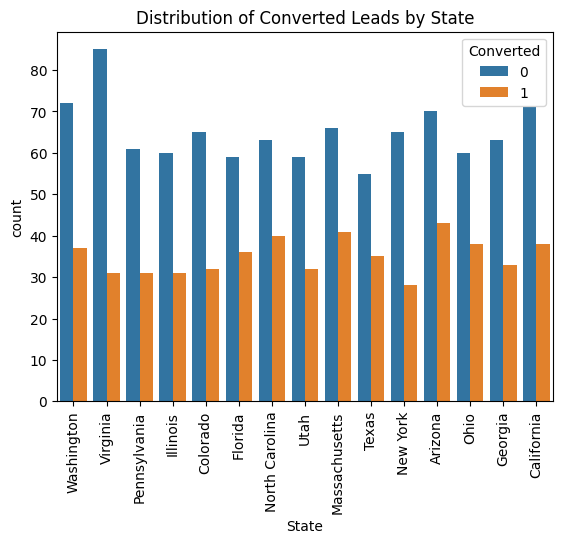

In [13]:
# Displaying the distribution of the target variable By State
sns.countplot(x='State', hue='Converted', data=df)
plt.title('Distribution of Converted Leads by State')
plt.xticks(rotation=90)
plt.show()

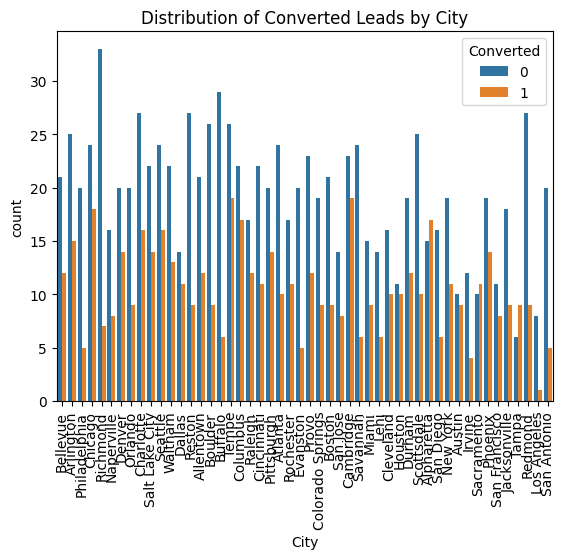

In [14]:
# Displaying the distribution of the target variable By City
sns.countplot(x='City', hue='Converted', data=df)
plt.title('Distribution of Converted Leads by City')
plt.xticks(rotation=90)
plt.show()

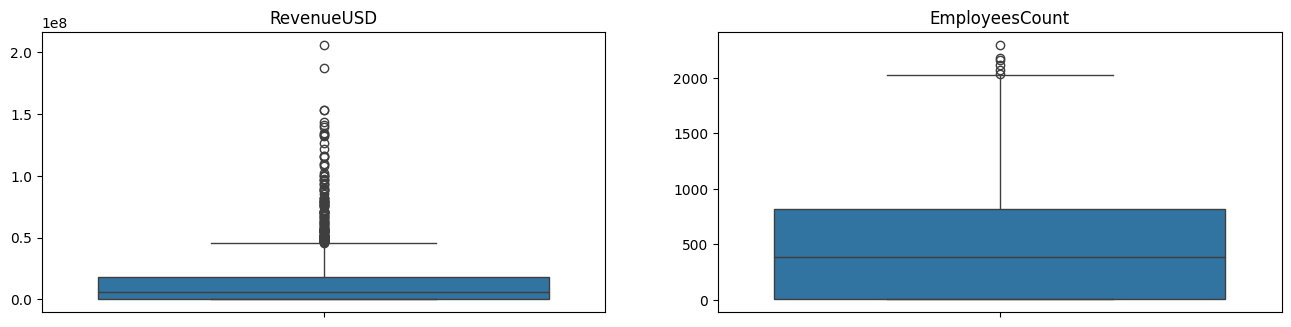

In [15]:
# Plot Boxplot for numerical features
numerical_features = ['RevenueUSD', 'EmployeesCount']
i=1
plt.figure(figsize=[16,8])
for col in numerical_features:
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [16]:
def clip_quantile(s, low=0.01, high=0.99):
    ql, qh = s.quantile(low), s.quantile(high)
    return s.clip(lower=ql, upper=qh)

# Sanity fix
df = df[(df["RevenueUSD"]>0) & (df["EmployeesCount"]>0)]
df["YearFounded"] = df["YearFounded"].clip(lower=1850, upper=2025)

# Transform
df["RevenueUSD_log"]  = np.log1p(df["RevenueUSD"])
df["Employees_log"]   = np.log1p(df["EmployeesCount"])

df["RevenueUSD_log"]  = clip_quantile(df["RevenueUSD_log"], 0.005, 0.995)
df["Employees_log"]   = clip_quantile(df["Employees_log"],   0.005, 0.995)

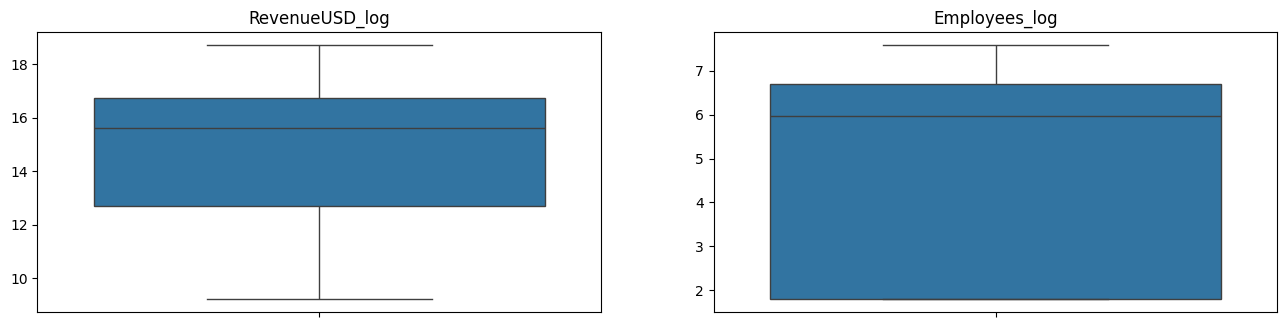

In [17]:
# Plot Boxplot for numerical features
numerical_features = ['RevenueUSD_log', 'Employees_log']
i=1
plt.figure(figsize=[16,8])
for col in numerical_features:
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

## Feature Engineering

In [18]:
df["CompanyAge"] = (2025 - df["YearFounded"]).clip(lower=0)
df["RevenueUSD_log"] = (df["RevenueUSD_log"] + 1).map(lambda x: np.log1p(x))
df["Employees_log"] = (df["Employees_log"] + 1).map(lambda x: np.log1p(x))
df["HasOwnerEmail"] = df["OwnerEmail"].notna().astype(int)
df["HasOwnerPhone"] = df["OwnerPhonesNumber"].notna().astype(int)
df["HasOwnerLinkedin"] = df["OwnerLinkedin"].notna().astype(int)

In [19]:
y = df["Converted"].astype(int)

In [20]:
num_cols = ["RevenueUSD_log","Employees_log","CompanyAge","YearFounded","RevenueUSD","EmployeesCount"]
cat_cols = ["Industry","BusinessModel","State"]
ord_col  = ["BBBRating"]
flag_cols= ["HasOwnerEmail","HasOwnerPhone", "HasOwnerLinkedin"]

In [21]:
bb_map = {"A+":6,"A":5,"A-":4,"B+":3,"B":2,"B-":1}
df["BBBRating"] = df["BBBRating"].map(bb_map).fillna(0)

## Create Model Training

In [22]:
X = df[num_cols + cat_cols + ord_col + flag_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler())]), num_cols),
        ("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                          ("ohe", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ("ord", SimpleImputer(strategy="most_frequent"), ord_col),
        ("flg", "passthrough", flag_cols),
    ]
)

In [23]:
model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, n_jobs=None))
])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
model.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
p_test = model.predict_proba(X_test)[:,1]
roc  = roc_auc_score(y_test, p_test)
pra  = average_precision_score(y_test, p_test)
print("ROC-AUC:", roc)
print("PR-AUC :", pra)

ROC-AUC: 0.6857985087567192
PR-AUC : 0.5262067187683347


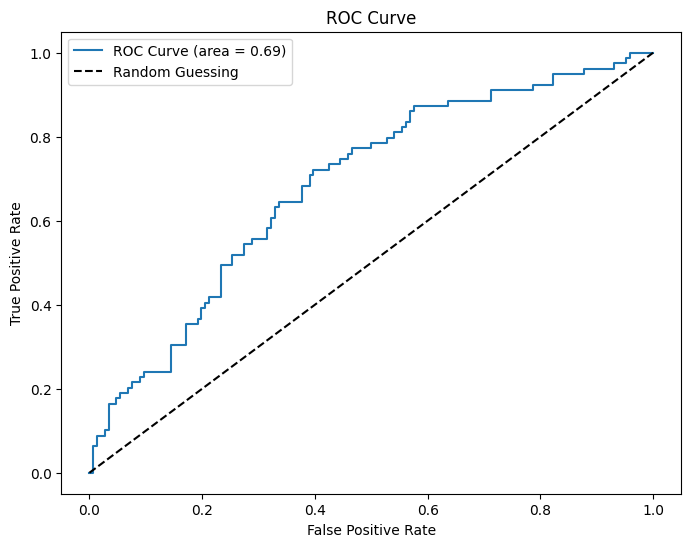

In [26]:
# Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, p_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, p_test)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
import joblib
import os, time
os.makedirs("models", exist_ok=True)
pipe_path = f"models/lead_scoring_pipeline.joblib"
joblib.dump(model, pipe_path, compress=3)

['models/lead_scoring_pipeline.joblib']